In [83]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import linear_model
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from help import getfile
import os

If saved = True the notebook will skip compiling all the csv files and just read the previously saved csv files. 

In [ ]:
Saved = False

The following block of code imports the names of all the cards and the sets they come from. We then read each csv with price data and make sure to only grab the data that is relevant to paper prices and not mtgo. Data_m contains all the aggregated data for all the prices for all cards found in the csv folder.

In [ ]:
names =  pd.read_csv(getfile("data","Cards_expanded.csv"),header = None, names = ["name","code","set"])



#names = names.set_index('name')
data_m = pd.DataFrame(range(3754))
data_m.columns = ['Date']
dates = []
time_start = pd.Timestamp('2010-11-02')

progress = 0
for i in range(3754):
    dates.append(time_start)
    time_start = time_start + pd.Timedelta(days = 1)
data_m['Date'] = pd.Series(dates)
data_m = data_m.set_index('Date')
print(data_m)
if saved == False:
    
    for index, row in names.iterrows():
        name = row.loc['set'].replace(" ","+") + '_' + row.loc['name'].replace(" ","+") + ".txt"
        name = name.replace("'","")
        name = name.replace('"',"")
        name = name.replace(",","")
        name = name.replace(":","_")
        name = name.replace("?","")
        #print(name)
        check = Path("C:/Users/thoma/Desktop/Magic Project/data/Price_Info/" + name)
        if check.is_file():
            data = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/Price_Info/" + name,header = None, names = ["Date","Price"])
            data['Date'] = pd.to_datetime(data['Date'])
            dupe = data[data.duplicated(subset = 'Date')]
        
            if not dupe.empty:
                num = dupe.iloc[0].name
                data = data.drop(data.index[num:-1])
                data = data.drop(data.index[-1])
                data = data.loc[data['Date'] > data['Date'].get(0)]
       
        
            data.columns = ['Date',name]
            data = data.set_index('Date')
        
            data_m[name]= data
            #time.sleep(5)
            #print(data_m)
        if progress % 100 == 0:
            print(progress)
        progress = progress + 1

This block of code forward fills the dataframe data_m into a new dataframe data_filled. THe commented code backfills the dataframe and fills any stragelers with 0.0. This bit also removes the columns that contain mixed datatypes.

In [11]:
if saved == False:
    data_filled = data_m.fillna(method='ffill')
    data_filled = data_filled.drop(data_filled.select_dtypes(exclude=['float64']).columns.to_list(),axis =1)
    #data_filled = data_filled.fillna(method='bfill')
    #data_filled = data_filled.fillna(0.0)

This bit here saves all the data such that we may open the file without going through the raw data which can take a while and take up memory. If Saved = False then the newly made data_m and data filled dataframes will be saved in the paths given below. if saved == true then it loads the data_frames from those csv files. This is done beacuse its faster when coming back to notebook to read a csv.

In [ ]:
if saved  == false:
    data_m.to_csv("C:/Users/thoma/Desktop/Magic Project/data/combined_with_Nan.csv")
    data_filled.to_csv("C:/Users/thoma/Desktop/Magic Project/data/combined_without_Nan.csv")

In [ ]:
if saved == True:
    data_m = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/combined_with_Nan.csv")
    data_filled = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/combined_without_Nan.csv")
    data_filled = data_filled.reset_index()
    data_m = data_m.reset_index()
    data_filled = data_filled.drop(columns = ['Index'])
    data_filled = data_filled.drop(columns = ['index'])
    data_m = data_m.drop(columns = ['Index'])
    data_m = data_m.drop(columns = ['index'])
    data_filled = data_filled.fillna(method = "bfill")

In [196]:
data_m

,Tenth+Edition_Ancestors+Chosen.txt,Tenth+Edition_Angel+of+Mercy.txt,Tenth+Edition_Aven+Cloudchaser.txt,Tenth+Edition_Ballista+Squad.txt,Tenth+Edition_Bandage.txt,Tenth+Edition_Beacon+of+Immortality.txt,Tenth+Edition_Benalish+Knight.txt,Tenth+Edition_Cho-Manno+Revolutionary.txt,Tenth+Edition_Condemn.txt,Tenth+Edition_Contaminated+Bond.txt,...,Zendikar_Timbermaw+Larva.txt,Zendikar_Turntimber+Ranger.txt,Zendikar_Zendikar+Farguide.txt,Zendikar_Adventuring+Gear.txt,Zendikar_Eternity+Vessel.txt,Zendikar_Hedron+Scrabbler.txt,Zendikar_Khalni+Gem.txt,Zendikar_Magosi+the+Waterveil.txt,Zendikar_Piranha+Marsh.txt,Zendikar_Quest+for+Ancient+Secrets.txt
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-03,NaN,NaN,NaN,NaN,NaN,3.42,NaN,0.90,NaN,NaN,...,NaN,1.18,NaN,NaN,1.62,NaN,NaN,1.13,NaN,NaN
2010-11-04,NaN,NaN,NaN,NaN,NaN,3.42,NaN,0.90,NaN,NaN,...,NaN,1.17,NaN,NaN,1.62,NaN,NaN,1.13,NaN,NaN
2010-11-05,NaN,NaN,NaN,NaN,NaN,3.42,NaN,0.90,NaN,NaN,...,NaN,1.17,NaN,NaN,1.62,NaN,NaN,1.13,NaN,NaN
2010-11-06,NaN,NaN,NaN,NaN,NaN,3.42,NaN,0.90,NaN,NaN,...,NaN,1.17,NaN,NaN,1.62,NaN,NaN,1.13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-06,0.24,0.25,0.2,0.24,0.33,2.23,0.2,0.59,0.34,0.20,...,0.19,0.89,0.19,0.24,7.58,0.2,0.29,0.57,0.25,0.25
2021-02-07,0.24,0.25,0.2,0.24,0.33,2.24,0.2,0.59,0.34,0.19,...,0.19,0.89,0.19,0.24,7.53,0.2,0.29,0.57,0.25,0.25
2021-02-08,0.24,0.25,0.2,0.24,0.33,2.23,0.2,0.60,0.34,0.19,...,0.19,0.89,0.18,0.24,7.50,0.2,0.29,0.57,0.25,0.25


In [ ]:
data_filled

In [197]:

std = data_filled.std()
std = std.sort_values(ascending = False)
print(std)

Unlimited+Edition_Black+Lotus.txt          4600.893246
Legends_Moat.txt                           2842.011223
Legends_Living+Plane.txt                   2337.424624
Unlimited+Edition_Timetwister.txt          1508.190639
Antiquities_Mishras+Workshop.txt           1440.808443
                                              ...     
Core+Set+2020_Sleep+Paralysis.txt             0.006322
Core+Set+2020_Steadfast+Sentry.txt            0.005643
Core+Set+2020_Daggersail+Aeronaut.txt         0.005061
War+of+the+Spark_Sarkhans+Catharsis.txt       0.004473
Core+Set+2020_Sorcerer+of+the+Fang.txt        0.003145
Length: 14775, dtype: float64


In [ ]:
std.to_csv("C:/Users/thoma/Desktop/Magic Project/data/std.csv")

In [ ]:
data_deltas = data_filled.diff()

In [ ]:
std = data_deltas.std()
std = std.sort_values(ascending = False)
print(std)
std.to_csv("C:/Users/thoma/Desktop/Magic Project/data/std_d.csv")

In [ ]:
std_cut = pd.Series(dtype = 'float64')
for column in data_deltas.columns:
    d = data_deltas[column].loc[data_deltas[column] != 0.0 ]
    #print(std_cut)
    std_cut[column] = d.std()
print(std_cut)

In [ ]:
std_cut=std_cut.sort_values(ascending = False)
std_cut.to_csv("C:/Users/thoma/Desktop/Magic Project/data/std_cut.csv")

This block of code goes through the filled data table data_filled and finds all the columns that have a mean under the value filtered_mean. It also checks that there arent any price spikes at the beginning of the data as we arent looking for anyhthing that starts high and falls quickly to close to 25 cents.

In [194]:
filtered_mean =2.0 #This must be a float
data_filtered = pd.DataFrame()
for column in data_filled.columns:
    d = data_filled[column]
    if d.iloc[0:int(data_filled[column].size /4 )].max() < 1.00 and d.mean() < filtered_mean:
        data_filtered[column] = data_filled[column]

std = data_filtered.std().sort_values(ascending= False)
print(std)

Unhinged______.txt                             7.842183
Homelands_Timmerian+Fiends.txt                 5.531123
Tenth+Edition_Cephalid+Constable.txt           3.562268
Legends_Heavens+Gate.txt                       3.179031
Antiquities_Drafnas+Restoration.txt            2.737192
                                                 ...   
Masters+Edition+III_Shu+Soldier-Farmers.txt    0.010433
Masters+Edition+IV_Spotted+Griffin.txt         0.010373
Fifth+Edition_Aether+Storm.txt                 0.009912
Planechase_Skeleton+Shard.txt                  0.009264
Masters+Edition+IV_Ironhoof+Ox.txt             0.008307
Length: 1972, dtype: float64


This block of code filters the remaining columns looking for a standard deviation higher than the std_value.

In [195]:
std_value = 0.5
std_filtered = pd.Series(dtype = 'float64')
std_filtered = std.loc[std > std_value]
print(std_filtered)

std_filtered.to_csv("C:/Users/thoma/Desktop/Magic Project/data/std_d.csv")

Unhinged______.txt                      7.842183
Homelands_Timmerian+Fiends.txt          5.531123
Tenth+Edition_Cephalid+Constable.txt    3.562268
Legends_Heavens+Gate.txt                3.179031
Antiquities_Drafnas+Restoration.txt     2.737192
                                          ...   
Nemesis_Rising+Waters.txt               0.516350
Archenemy_Rakdos+Signet.txt             0.514045
Lorwyn_Purity.txt                       0.507200
Unlimited+Edition_Pestilence.txt        0.505628
Unlimited+Edition_Plague+Rats.txt       0.501320
Length: 250, dtype: float64


This plots all the columns found in the std_filtered series and saves them. Doesnt run by default.

In [198]:
if False:
    for row in std_filtered.iteritems():
        data_filled[row[0]].plot()
        plt.title(row[0])
        plt.savefig('C:/Users/thoma/Desktop/Magic Project/data/graphs/std_above_half_mean_below_2/'+ row[0] +'.png')
        plt.show()

This loads up all the data for the cards like "name" "setCode". But also loads up the data for the sets like 'name' 'code' 'releaseDate'.

In [17]:
set_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/sets.csv",usecols= ['name','code','releaseDate'])
set_info.columns = ['setCode','setName','releaseDate']
card_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/cards.csv",usecols=["name","setCode","edhrecRank","convertedManaCost","isReserved","originalReleaseDate","rarity","text"])
card_info.columns = ["convertedManaCost","edhrecRank","isReserved","name","originalReleaseDate","rarity","setCode","text"]

c:\users\thoma\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
card_info

,convertedManaCost,edhrecRank,isReserved,name,originalReleaseDate,rarity,setCode,text
0,7.0,15723.0,0,Ancestor's Chosen,NaN,uncommon,10E,First strike (This creature deals combat damag...
1,5.0,12809.0,0,Angel of Mercy,NaN,uncommon,10E,Flying\nWhen Angel of Mercy enters the battlef...
2,4.0,11227.0,0,Aven Cloudchaser,NaN,common,10E,Flying (This creature can't be blocked except ...
3,4.0,12901.0,0,Ballista Squad,NaN,uncommon,10E,"{X}{W}, {T}: Ballista Squad deals X damage to ..."
4,1.0,3975.0,0,Bandage,NaN,common,10E,Prevent the next 1 damage that would be dealt ...
...,...,...,...,...,...,...,...,...
56776,2.0,1147.0,0,Into the Roil,NaN,common,ZNR,Kicker {1}{U} (You may pay an additional {1}{U...
56777,1.0,8902.0,0,Bloodchief's Thirst,NaN,uncommon,ZNR,Kicker {2}{B} (You may pay an additional {2}{B...
56778,2.0,14041.0,0,Roil Eruption,NaN,common,ZNR,Kicker {5} (You may pay an additional {5} as y...
56779,3.0,1888.0,0,Roiling Regrowth,NaN,uncommon,ZNR,Sacrifice a land. Search your library for up t...


Merge the two data sets to have all relevant data in one place.

In [19]:
card_info = card_info.merge(set_info, on = 'setCode')

This drops all the duplicates and keeps the first card that appears in alphabetical order. IN the future when we have the correct data we would rather have this drop duplicates and keep the first printing of a card.

In [20]:
card_info = card_info.drop_duplicates(subset = ['name'])

once the correct cards are scraped again this is the filter that needs to be used and not the one above

In [ ]:
card_info.sort_values(by=['releaseDate'],ascending = 'True').drop_duplicates(subset = ['name'])

This line removes the apostrophes so we can actually find keys between future dataframes

In [ ]:
card_info['name']= card_info['name'].replace(to_replace = r"'",value = '', regex = True)

Data_filtered is created which is a dataframe made of relevant columns from the std_filtered entries. It also revmoves the '.txt' and removes any special characters.

In [201]:
data_filtered = data_filled[std_filtered.index]
data_filtered.columns = data_filtered.columns.to_series().replace(to_replace = r'.txt',value = '', regex = True)
data_filtered.columns = data_filtered.columns.to_series().replace(to_replace = r'\W',value = ' ', regex = True)

In [202]:
data_filtered

,Unhinged______,Homelands_Timmerian Fiends,Tenth Edition_Cephalid Constable,Legends_Heavens Gate,Antiquities_Drafnas Restoration,Antiquities_Martyrs of Korlis,Ice Age_Jesters Mask,Mercadian Masques_Rishadan Brigand,Future Sight_Gibbering Descent,Odyssey_Bearscape,...,Unlimited Edition_Wall of Brambles,Archenemy_Batwing Brume,Unlimited Edition_Wall of Water,Unlimited Edition_Ley Druid,Mirrodin Besieged_Creeping Corrosion,Nemesis_Rising Waters,Archenemy_Rakdos Signet,Lorwyn_Purity,Unlimited Edition_Pestilence,Unlimited Edition_Plague Rats
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-02,0.50,0.57,NaN,0.73,0.42,0.64,0.97,NaN,NaN,NaN,...,0.65,0.30,0.65,0.62,NaN,NaN,0.37,NaN,0.35,0.38
2010-11-03,0.50,0.57,0.64,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
2010-11-04,0.50,0.57,0.64,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
2010-11-05,0.50,0.57,0.64,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
2010-11-06,0.50,0.57,0.87,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-06,0.57,0.99,9.29,3.47,2.99,25.99,15.13,2.47,8.32,3.93,...,2.22,1.43,1.35,1.41,0.62,1.88,1.89,1.90,1.21,1.74
2021-02-07,0.57,0.99,9.26,4.99,2.99,25.00,14.99,2.47,8.32,3.95,...,2.22,1.43,1.39,1.41,0.61,1.88,1.79,1.90,1.19,1.74
2021-02-08,0.57,1.00,9.26,4.99,2.97,25.00,14.99,2.47,8.35,3.95,...,2.27,1.43,1.43,1.43,0.63,1.88,1.79,1.90,1.23,1.74


This bit goes through the columns of the prepared data_filtered dataframe and seperates the names and set names.

In [49]:
names_index = []
sets_index = []
mixed = np.char.partition(data_filtered.columns.to_numpy(dtype = str), '_').tolist()
for tup in mixed:
    names_index.append(tup[2])
    sets_index.append(tup[0])
mixed = list(zip(names_index,sets_index))
print(mixed)


[('_____', 'Unhinged'), ('Timmerian Fiends', 'Homelands'), ('Cephalid Constable', 'Tenth Edition'), ('Heavens Gate', 'Legends'), ('Drafnas Restoration', 'Antiquities'), ('Martyrs of Korlis', 'Antiquities'), ('Jesters Mask', 'Ice Age'), ('Rishadan Brigand', 'Mercadian Masques'), ('Gibbering Descent', 'Future Sight'), ('Bearscape', 'Odyssey'), ('Corrosion', 'Visions'), ('Touch of Darkness', 'Legends'), ('Niall Silvain', 'The Dark'), ('Phyrexian Purge', 'Mirage'), ('Seeds of Innocence', 'Mirage'), ('Salvage', 'Portal Second Age'), ('Grim Feast', 'Mirage'), ('Lure of Prey', 'Mirage'), ('Adventurers Guildhouse', 'Legends'), ('Needle Specter', 'Eventide'), ('Pale Bears', 'Ice Age'), ('Scarwood Bandits', 'The Dark'), ('Unfulfilled Desires', 'Mirage'), ('Mystic Remora', 'Ice Age'), ('Carrion', 'Mirage'), ('Tectonic Instability', 'Invasion'), ('Keldon Firebombers', 'Prophecy'), ('Veilstone Amulet', 'Future Sight'), ('Chaosphere', 'Mirage'), ('Whim of Volrath', 'Tempest'), ('Harbinger of Night',

Creates a dataFrame with tuples as the column names so we can properly key to the card_info dataframe. the tuples are as such (card_name,set_name)

In [50]:
data_connected = data_filtered
data_connected.columns = mixed

In [51]:
data_connected

,"(_____, Unhinged)","(Timmerian Fiends, Homelands)","(Cephalid Constable, Tenth Edition)","(Heavens Gate, Legends)","(Drafnas Restoration, Antiquities)","(Martyrs of Korlis, Antiquities)","(Jesters Mask, Ice Age)","(Rishadan Brigand, Mercadian Masques)","(Gibbering Descent, Future Sight)","(Bearscape, Odyssey)",...,"(Wall of Brambles, Unlimited Edition)","(Batwing Brume, Archenemy)","(Wall of Water, Unlimited Edition)","(Ley Druid, Unlimited Edition)","(Creeping Corrosion, Mirrodin Besieged)","(Rising Waters, Nemesis)","(Rakdos Signet, Archenemy)","(Purity, Lorwyn)","(Pestilence, Unlimited Edition)","(Plague Rats, Unlimited Edition)"
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-02,0.50,0.57,NaN,0.73,0.42,0.64,0.97,NaN,NaN,NaN,...,0.65,0.30,0.65,0.62,NaN,NaN,0.37,NaN,0.35,0.38
2010-11-03,0.50,0.57,0.64,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
2010-11-04,0.50,0.57,0.64,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
2010-11-05,0.50,0.57,0.64,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
2010-11-06,0.50,0.57,0.87,0.73,0.42,0.64,0.97,0.90,0.62,0.90,...,0.65,0.30,0.65,0.62,NaN,0.90,0.37,0.92,0.35,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-06,0.57,0.99,9.29,3.47,2.99,25.99,15.13,2.47,8.32,3.93,...,2.22,1.43,1.35,1.41,0.62,1.88,1.89,1.90,1.21,1.74
2021-02-07,0.57,0.99,9.26,4.99,2.99,25.00,14.99,2.47,8.32,3.95,...,2.22,1.43,1.39,1.41,0.61,1.88,1.79,1.90,1.19,1.74
2021-02-08,0.57,1.00,9.26,4.99,2.97,25.00,14.99,2.47,8.35,3.95,...,2.27,1.43,1.43,1.43,0.63,1.88,1.79,1.90,1.23,1.74


In [ ]:
print(card_info.loc[card_info['name'] == data_connected.columns.to_series().iloc[0][0]].loc[card_info['setName'] == data_connected.columns.to_series().iloc[0][1]])

In [ ]:
card_info.loc[card_info['name'] == data_connected.columns.to_series().iloc[0][0]].loc[card_info['setName'] == data_connected.columns.to_series().iloc[0][1]]

In [ ]:
card_info['name'].isin(list(zip(*data_connected.columns.to_series().iloc[0:-1]))[0])

In [ ]:
card_info.loc.isin(list(zip(*data_connected.columns.to_series().iloc[0:-1]))[0]) & card_info['setName'].isin(list(zip(*data_connected.columns.to_series().iloc[0:-1]))[1]) 

Creates a data_frame with only the relevant entries.

In [53]:
data_card_info = card_info.loc[card_info['name'].isin(list(zip(*data_connected.columns.to_series().iloc[0:-1]))[0]) & card_info['setName'].isin(list(zip(*data_connected.columns.to_series().iloc[0:-1]))[1])]

Adds more columns to each row that may contain relvant data

In [153]:
std_for_cards = []
mean_for_cards = []
abs_diff = []
rarity_num = []
for row in data_card_info.iterrows():
    std_for_cards.append(data_connected[(row[1]['name'],row[1]['setName'])].std())
    mean_for_cards.append(data_connected[(row[1]['name'],row[1]['setName'])].mean())
    abs_diff.append(data_connected[(row[1]['name'],row[1]['setName'])].max()-data_connected[(row[1]['name'],row[1]['setName'])].min())
    if row[1]['rarity'] == 'common':
        rarity_num.append(1)
    elif row[1]['rarity'] == 'uncommon':
        rarity_num.append(2)
    elif row[1]['rarity'] == 'rare':
        rarity_num.append(3)
    elif row[1]['rarity'] == 'mythic':
        rarity_num.append(4)
        
data_card_info['std'] = std_for_cards
data_card_info['mean'] = mean_for_cards
data_card_info['abs_diff'] = abs_diff
data_card_info['rarity_num'] = rarity_num
data_card_info['releaseDate'] = pd.to_datetime(data_card_info['releaseDate'])
now = pd.Timestamp('now')
data_card_info['age'] = (now - data_card_info['releaseDate']).astype('<m8[Y]')
data_card_info = data_card_info.sort_values(by = ['std'], ascending = False)

In [185]:
#data_card_info.loc[data_card_info['name'].isin(['Timmerian Fiends'])].index.values[0]

21790

In [186]:
#data_card_info = data_card_info.drop(data_card_info.loc[data_card_info['name'].isin(['Timmerian Fiends'])].index.values[0])

In [189]:
data_card_info.sort_values(by = 'age', ascending = False)

,convertedManaCost,edhrecRank,isReserved,name,originalReleaseDate,rarity,setCode,text,setName,releaseDate,std,mean,abs_diff,age,rarity_num
628,4.0,2333.0,0,Pestilence,NaN,common,2ED,"At the beginning of the end step, if no creatu...",Unlimited Edition,1993-12-01,0.505628,0.636774,1.60,27.0,1
653,1.0,16992.0,0,Earthbind,NaN,common,2ED,Enchant creature\nWhen Earthbind enters the ba...,Unlimited Edition,1993-12-01,0.752450,0.597443,4.00,27.0,1
737,1.0,291.0,0,Wild Growth,NaN,common,2ED,Enchant land\nWhenever enchanted land is tappe...,Unlimited Edition,1993-12-01,0.619015,0.724547,2.75,27.0,1
778,1.0,15785.0,0,Soul Net,NaN,uncommon,2ED,"Whenever a creature dies, you may pay {1}. If ...",Unlimited Edition,1993-12-01,0.630450,0.791753,2.10,27.0,2
656,5.0,12908.0,0,Fire Elemental,NaN,uncommon,2ED,NaN,Unlimited Edition,1993-12-01,1.627657,1.365663,7.62,27.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48925,4.0,3060.0,0,Dissipation Field,NaN,rare,SOM,"Whenever a permanent deals damage to you, retu...",Scars of Mirrodin,2010-10-01,0.584156,0.824927,1.72,10.0,3
47014,6.0,3112.0,0,Recurring Insight,NaN,rare,ROE,Draw cards equal to the number of cards in tar...,Rise of the Eldrazi,2010-04-23,0.764110,1.083400,2.27,10.0,3
6437,2.0,100.0,0,Azorius Signet,NaN,common,ARC,"{1}, {T}: Add {W}{U}.",Archenemy,2010-06-18,1.293467,1.677222,4.49,10.0,1
47001,5.0,3153.0,0,Gravitational Shift,NaN,rare,ROE,Creatures with flying get +2/+0.\nCreatures wi...,Rise of the Eldrazi,2010-04-23,0.756440,0.675156,3.70,10.0,3


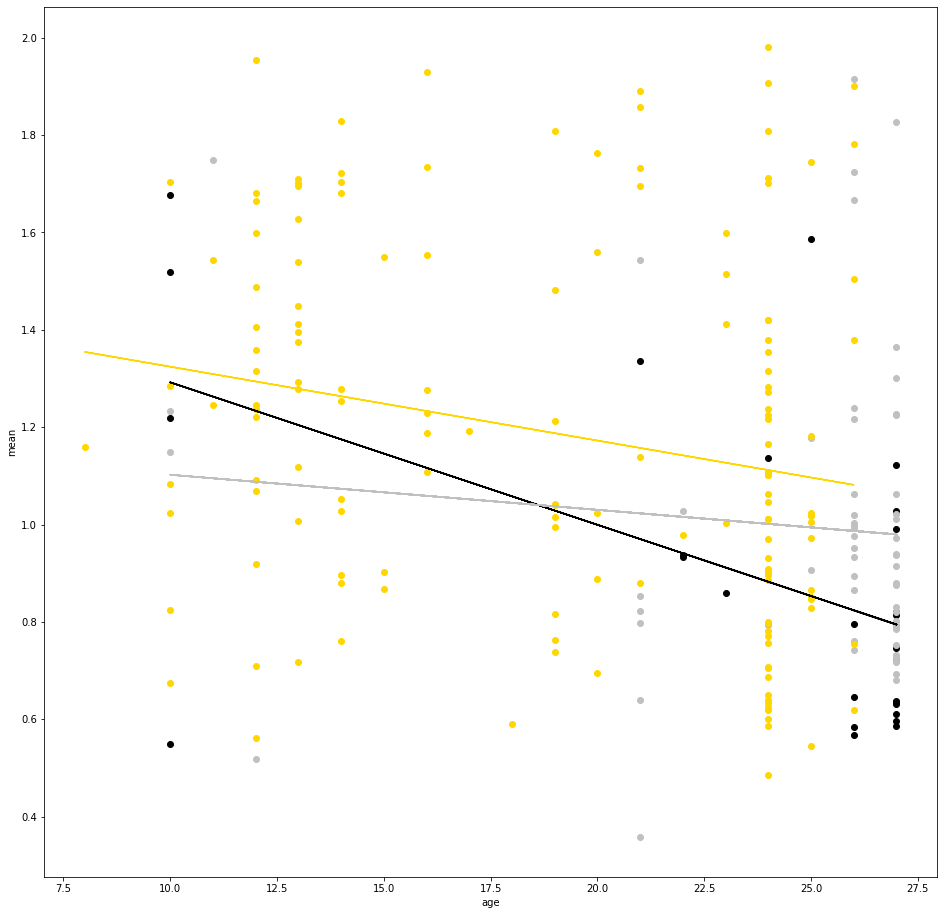

In [192]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)
reg_c = linear_model.LinearRegression()
reg_u = linear_model.LinearRegression()
reg_r = linear_model.LinearRegression()

#ax = plt.axes(projection ="3d")

common_age =data_card_info['age'].loc[data_card_info['rarity'].isin(['common'])].values.reshape(data_card_info['age'].loc[data_card_info['rarity'].isin(['common'])].values.size,1)
common_mean = data_card_info['mean'].loc[data_card_info['rarity'].isin(['common'])].values.reshape(data_card_info['mean'].loc[data_card_info['rarity'].isin(['common'])].values.size,1)
common_abs_diff = data_card_info['abs_diff'].loc[data_card_info['rarity'].isin(['common'])].values.reshape(data_card_info['abs_diff'].loc[data_card_info['rarity'].isin(['common'])].values.size,1)
common_std = data_card_info['std'].loc[data_card_info['rarity'].isin(['common'])].values.reshape(data_card_info['std'].loc[data_card_info['rarity'].isin(['common'])].values.size,1)
uncommon_age =data_card_info['age'].loc[data_card_info['rarity'].isin(['uncommon'])].values.reshape(data_card_info['age'].loc[data_card_info['rarity'].isin(['uncommon'])].values.size,1)
uncommon_mean = data_card_info['mean'].loc[data_card_info['rarity'].isin(['uncommon'])].values.reshape(data_card_info['mean'].loc[data_card_info['rarity'].isin(['uncommon'])].values.size,1)
uncommon_abs_diff = data_card_info['abs_diff'].loc[data_card_info['rarity'].isin(['uncommon'])].values.reshape(data_card_info['abs_diff'].loc[data_card_info['rarity'].isin(['uncommon'])].values.size,1)
uncommon_std = data_card_info['std'].loc[data_card_info['rarity'].isin(['uncommon'])].values.reshape(data_card_info['std'].loc[data_card_info['rarity'].isin(['uncommon'])].values.size,1)
rare_age = data_card_info['age'].loc[data_card_info['rarity'].isin(['rare'])].values.reshape(data_card_info['age'].loc[data_card_info['rarity'].isin(['rare'])].values.size,1)
rare_mean =data_card_info['mean'].loc[data_card_info['rarity'].isin(['rare'])].values.reshape(data_card_info['mean'].loc[data_card_info['rarity'].isin(['rare'])].values.size,1)
rare_abs_diff = data_card_info['abs_diff'].loc[data_card_info['rarity'].isin(['rare'])].values.reshape(data_card_info['abs_diff'].loc[data_card_info['rarity'].isin(['rare'])].values.size,1)
rare_std = data_card_info['std'].loc[data_card_info['rarity'].isin(['rare'])].values.reshape(data_card_info['std'].loc[data_card_info['rarity'].isin(['rare'])].values.size,1)

reg_c.fit(common_age,common_mean)
reg_u.fit(uncommon_age,uncommon_mean)
reg_r.fit(rare_age,rare_mean)
plt.xlabel('age')
plt.ylabel('mean')
plt.scatter(common_age,common_mean,color = 'black')
plt.scatter(uncommon_age,uncommon_mean,color = 'silver')
plt.scatter(rare_age,rare_mean,color = 'gold')
plt.plot(common_age,reg_c.predict(common_age),color = 'black')
plt.plot(uncommon_age,reg_u.predict(uncommon_age),color = 'silver')
plt.plot(rare_age,reg_r.predict(rare_age),color = 'gold')
plt.savefig('C:/Users/thoma/Desktop/Magic Project/data/graphs/Scatter/age_mean_scatter.png')

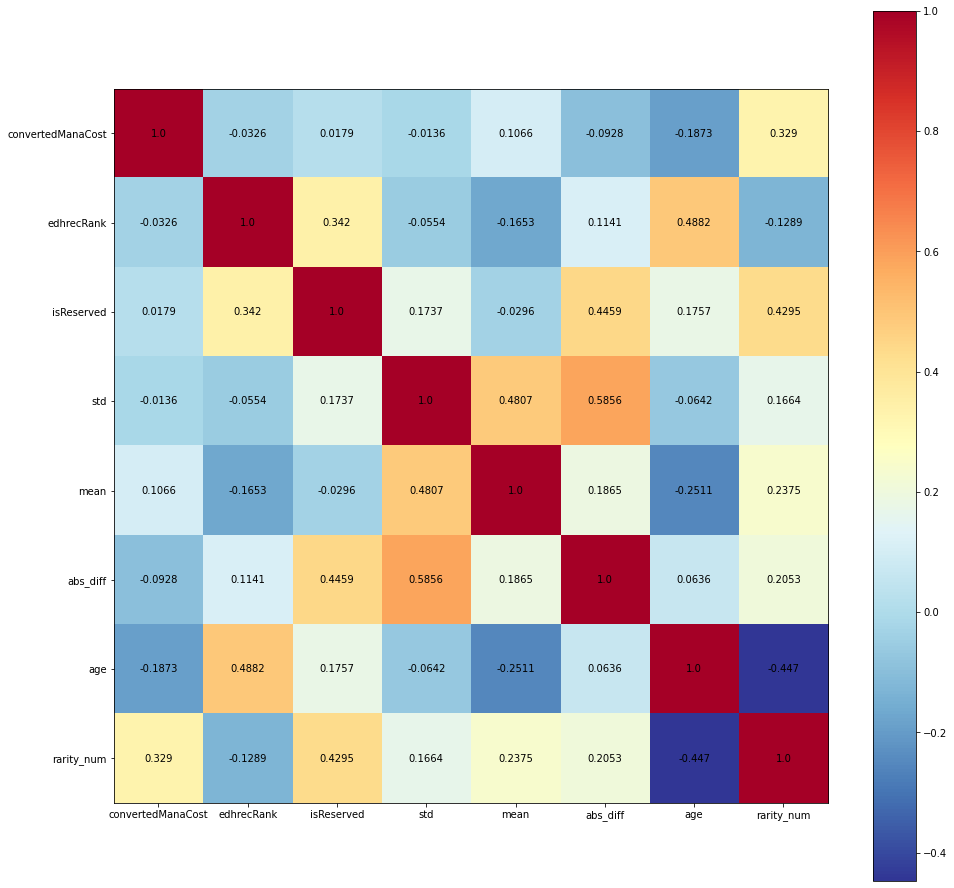

In [156]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)
cmap = plt.cm.get_cmap('RdYlBu')
plt.imshow(data_card_info.corr(method = 'kendall'),cmap.reversed())
plt.colorbar()

plt.xticks(range(len(data_card_info.corr(method = 'kendall'))), data_card_info.corr(method = 'kendall').columns)
plt.yticks(range(len(data_card_info.corr(method = 'kendall'))), data_card_info.corr(method = 'kendall').index)
for i in range(len(data_card_info.corr(method = 'kendall'))):
    for j in range(len(data_card_info.corr(method = 'kendall'))):
        plt.text(i,j,round(data_card_info.corr(method = 'kendall').iloc[i,j],4),ha="center", va="center")
    
plt.savefig('C:/Users/thoma/Desktop/Magic Project/data/graphs/HeatMap.png')
plt.show()

In [71]:
rare_age

array([[27.],
       [22.],
       [25.],
       [21.],
       [10.],
       [10.],
       [10.],
       [27.],
       [24.],
       [22.],
       [23.],
       [27.],
       [26.],
       [27.],
       [27.],
       [26.],
       [27.],
       [27.],
       [27.],
       [27.],
       [26.],
       [26.],
       [27.],
       [27.],
       [27.],
       [10.],
       [27.]])

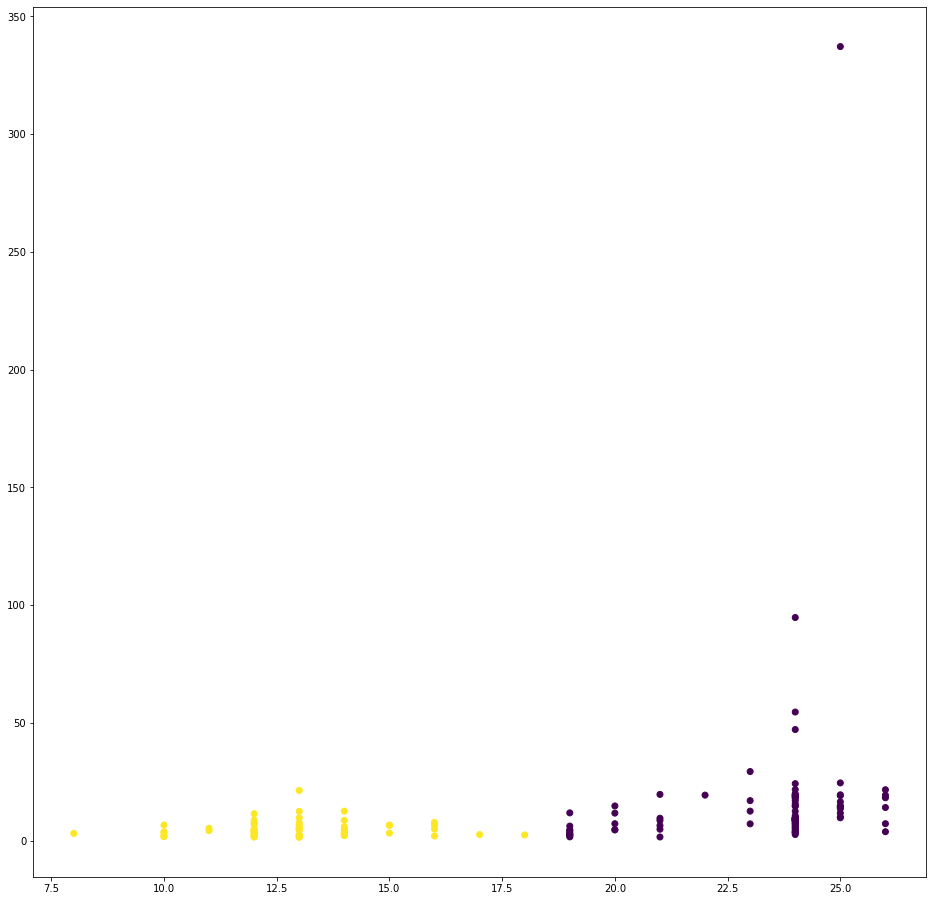

In [161]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)
#ax = plt.axes(projection ="3d")
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(rare_age,rare_abs_diff)
#ax.set_ylabel('rare_age')
#ax.set_xlabel('rare_abs_diff')
#ax.set_zlabel('rare_mean')
plt.scatter(rare_age,rare_abs_diff, c= kmeans.labels_.astype(float))

#plt.plot(rare_age,kmeans.predict(rare_age,rare_mean),color = 'black')

